# PROJECT_MOD2_LINEAR REGRESSION

### 1. DATA PREPROCESSING

### 1.1 Import Libraries

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


import gc; gc.enable()

import warnings
warnings.filterwarnings("ignore")

In [165]:
from pyearth import Earth

from pygam import LinearGAM
from pygam import GAM
from pygam.terms import s as spline
from pygam.terms import f as factor
from pygam.terms import te as tensor

### 1.2. Read in Data

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head().append(df.tail())

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
print(df.columns.to_list())

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


### 1.3. Data Cleaning

### a) Column 'date'

In [9]:
### convert 'date of sale' column to 'datetime' type
df['date'] = pd.to_datetime(df.date) 

# split column with years values only
df['year_sale'] = df['date'].dt.year # year sale
df['month_sale'] = df['date'].dt.month # month sale

In [10]:
# df[['date','year_sale','month_sale']].head()

In [11]:
# drop 'date' column
df.drop(columns = ['date'], inplace= True)

### b) Column 'sqft_basement'

In [12]:
### 'sqft_basement' column is object type, check content
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1284.0        1
1525.0        1
652.0         1
225.0         1
1281.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [13]:
# convert to integer type, '?' will be converted to NaN
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [14]:
# get median, mean for sqft_basement
df['sqft_basement'].agg(['median', 'mean'])

median      0.000000
mean      291.851724
Name: sqft_basement, dtype: float64

In [15]:
# replace Nan values with median=0
df['sqft_basement'].fillna(value = df['sqft_basement'].median(),inplace=True)

### c) Column 'id'. Check for duplicates

In [17]:
df.duplicated().sum()

0

In [18]:
### Check for duplicates by 'id' columns
df.id.value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [20]:
# check first id, house sold 3 times
df.loc[df.id == 795000620]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,month_sale
17588,795000620,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,2,...,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,2014,9
17589,795000620,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,2,...,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250,2014,12
17590,795000620,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,2,...,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250,2015,3


### d) Column 'bedrooms'.

In [21]:
# check bedrooms columns
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [22]:
# look closer for bedrroms >= 10
df.loc[df['bedrooms'] >= 10]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,month_sale
8748,1773100755,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,3,...,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960,2014,8
13301,627300145,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,3,...,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400,2014,8
15147,5566100170,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,4,...,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914,2014,10
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,...,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,2014,6
19239,8812401450,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,...,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745,2014,12


In [23]:
# drop row with 33 bedrooms. not matching per tot. sq.ft
df.drop(index=15856,inplace = True)

### e) Column 'waterfront'.

In [24]:
# check 'waterfront' column
df['waterfront'].value_counts()

0.0    19074
1.0      146
Name: waterfront, dtype: int64

In [25]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [26]:
# replace NAN with median=0
df['waterfront'].fillna(value = df['waterfront'].median(),inplace=True)

In [27]:
# verify 'waterfront' by value_counts()
df['waterfront'].value_counts()

0.0    21450
1.0      146
Name: waterfront, dtype: int64

### f) Column 'view'.

In [28]:
# check values in 'view' column
df['view'].value_counts()

0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [29]:
#replace Nan values with median = 0
df['view'].fillna(value = df['view'].median(),inplace=True)

In [30]:
# verify 'view' by value_counts()
df['view'].value_counts()

0.0    19484
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

### g) Column 'yr_renovated'. 

In [31]:
# check 'yr_renovated' column
df['yr_renovated'].value_counts()

0.0       17010
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [32]:
#replace Nan values with median = 0
df['yr_renovated'].fillna(value = df['yr_renovated'].median(),inplace=True)

In [33]:
# verify 'yr_renovated' by value_counts()
df['yr_renovated'].value_counts()

0.0       20852
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [34]:
### better to drop 'yr_renovated' as majority is missing.
# also drop'id' column
df.drop(columns=['id','yr_renovated'],inplace = True)

In [35]:
# final check for nan values
# df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 20 columns):
price            21596 non-null float64
bedrooms         21596 non-null int64
bathrooms        21596 non-null float64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
view             21596 non-null float64
condition        21596 non-null int64
grade            21596 non-null int64
sqft_above       21596 non-null int64
sqft_basement    21596 non-null float64
yr_built         21596 non-null int64
zipcode          21596 non-null int64
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
year_sale        21596 non-null int64
month_sale       21596 non-null int64
dtypes: float64(8), int64(12)
memory usage: 3.5 MB


### h) Target Column 'price'. 

In [37]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year_sale,month_sale
count,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,0.006761,0.233191,3.409752,7.657946,1788.631506,285.702954,1971.000787,98077.950685,47.560087,-122.213977,1986.650722,12758.656649,2014.322976,6.573995
std,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,0.081946,0.764689,0.650471,1.173218,827.763251,439.825454,29.375460,53.514040,0.138552,0.140725,685.231768,27275.018316,0.467625,3.115131
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


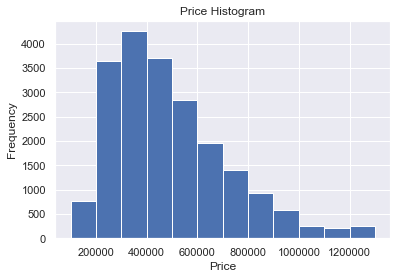

In [63]:
### plot 'price' histogram
bins = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]) * 1000
plt.hist(x=df['price'],bins=bins)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Histogram')
plt.show()

### i) check multicollinearity 


In [90]:
used_cols = [c for c in df.columns.tolist() if c not in ['price']]
X, y = df[used_cols], df['price']

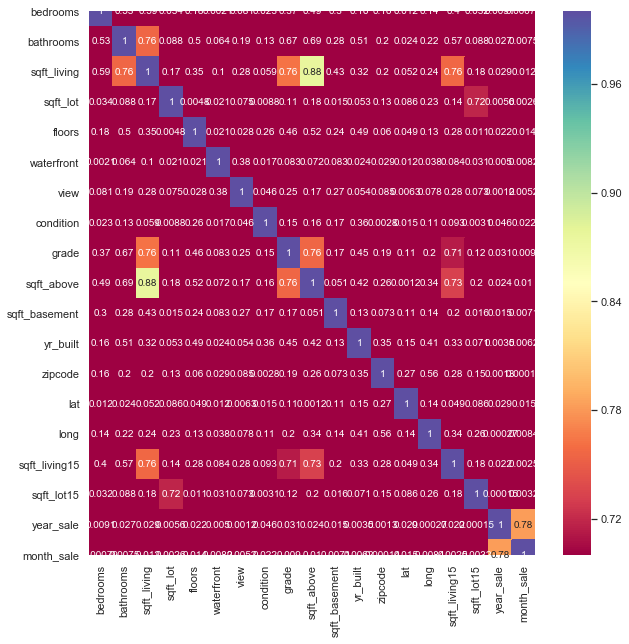

In [114]:
# check multicollinearity
plt.figure(figsize=(10,10))

sns.heatmap(X.corr().abs(), cmap = "Spectral", annot = True, vmin=0.7)


In [117]:
### there are some collinearity between [sqft_living] and 
# ['sqft_above','grade','bathrooms','sqft_lot15', 'sqft_living15']

### [sqft_lot] colliniear with [sqft_lot_15]

###  [yr_sale] with [month_sale]

In [118]:
#All features
used_cols = [c for c in df.columns.tolist() if c not in ['price']]
X, y = df[used_cols], df['price']

#lets create used_cols_reduced with some of the features dropped
used_cols_red = ['bedrooms', 'bathrooms', 'sqft_living', 
                 'sqft_lot', 'floors', 'waterfront', 'view', 
                 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 
                 'zipcode', 'lat', 'long','year_sale']
X_red = df[used_cols_red]

### 2. BASELINE MODEL - Linear Regression

### 2a) Helper Functions 

In [126]:
### Code Source: Notebook from lecture
# Quick helper functions
def model_evaluate(old_pipe, bagging=True):
    if bagging:
        pipe = BaggingRegressor(old_pipe, n_estimators=3)
    else:
        pipe = old_pipe
        
    metrics = ['r2', 
               'neg_mean_absolute_error', 
               'neg_mean_squared_error']
    
    # cross validate returns a dictionary object
    # * https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
    preds = cross_validate(pipe, X, y, 
                           cv=5, n_jobs=-1, 
                           scoring=metrics,
                           return_estimator=True)

    print("-"*60)
    for i, tag in enumerate(preds):
        if 'time' not in tag and 'estimator' not in tag:
            print(tag, ":\n\t\t\t\t\t", 
                  "%.4f" % preds[tag].mean(), 
                  "+/-", 
                  "%.4f" % preds[tag].std())
            if i % 2 == 0:
                print()
                print("-"*60)
                
    if bagging:
        coeffs = []
        for i in range(3):
            for j in range(3):
                estimator = preds['estimator'][i].estimators_[j]
                modeling_step = estimator.steps[1][0]
                coef = estimator.named_steps[modeling_step].coef_
                coeffs.append(coef)

        coeffs = [(
            "Beta_%s" % (i+1), 
            "%.4f" % np.mean(coeffs, axis=0)[i],
            "%.4f" % np.std(coeffs, axis=0)[i],
        ) for i in range(len(used_cols))]
        for coeff in coeffs:
            print(coeff[0], ":\t", coeff[1], "+/-", coeff[2])

        print()
        print("-"*60)
        
    return preds['estimator'] # this is a list of pipelines


def model_predict(pipe):
    y_preds = [pipe[i].predict(X) for i in range(len(pipe))]
    y_pred = np.mean(y_preds, axis=0)
    return y_pred


def plot_residuals():
    SIZE = (20,8)

    plt.figure(figsize=SIZE)
    sns.scatterplot(y_pred, (y - y_pred))
    sns.lineplot(y_pred, [0]*len(y_pred), color='red')
    sns.lineplot(y_pred, [1]*len(y_pred), color='green')
    sns.lineplot(y_pred, [-1]*len(y_pred), color='green')
    plt.xlabel("Predicted")
    plt.ylabel("Residual")
    plt.show()

    plt.figure(figsize=SIZE)
    plt.hist(y - y_pred, bins=20)
    # TODO: Add vertical lines at x=-1,0,1
    plt.show()

### 2b) Baseline : Linear (OLS) Regression with all features

------------------------------------------------------------
test_r2 :
					 0.6967 +/- 0.0083
test_neg_mean_absolute_error :
					 -126864.7450 +/- 3007.1521

------------------------------------------------------------
test_neg_mean_squared_error :
					 -40881699233.7214 +/- 3884425146.1386
Beta_1 :	 -38400.4110 +/- 4489.8321
Beta_2 :	 32897.6349 +/- 4061.9112
Beta_3 :	 112959.9791 +/- 35856.4526
Beta_4 :	 485.2330 +/- 254.3946
Beta_5 :	 11014.5703 +/- 6077.3006
Beta_6 :	 611665.8765 +/- 64240.6991
Beta_7 :	 55161.4870 +/- 3899.2276
Beta_8 :	 26404.9923 +/- 2203.8659
Beta_9 :	 98074.1043 +/- 2657.0404
Beta_10 :	 83525.7439 +/- 33618.3939
Beta_11 :	 27656.7922 +/- 14489.1571
Beta_12 :	 -127184.7415 +/- 5451.7507
Beta_13 :	 -50736.6527 +/- 4310.9767
Beta_14 :	 124409.4415 +/- 2081.0123
Beta_15 :	 -45286.2867 +/- 4236.7398
Beta_16 :	 19672.8112 +/- 6401.1284
Beta_17 :	 -1509.9565 +/- 316.1757
Beta_18 :	 36484.7480 +/- 4957.5513
Beta_19 :	 4600.5626 +/- 2473.9972

----------------------

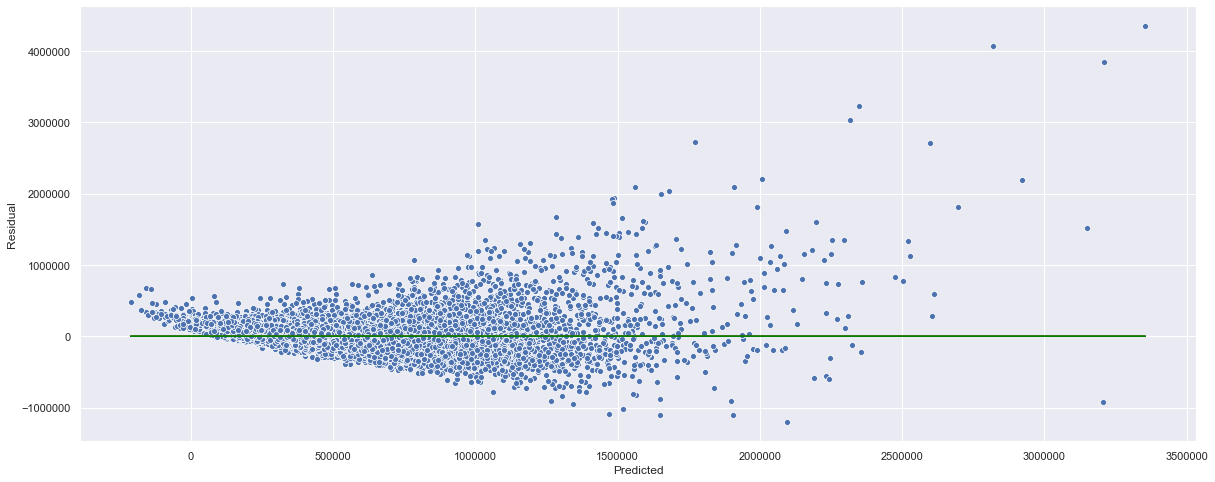

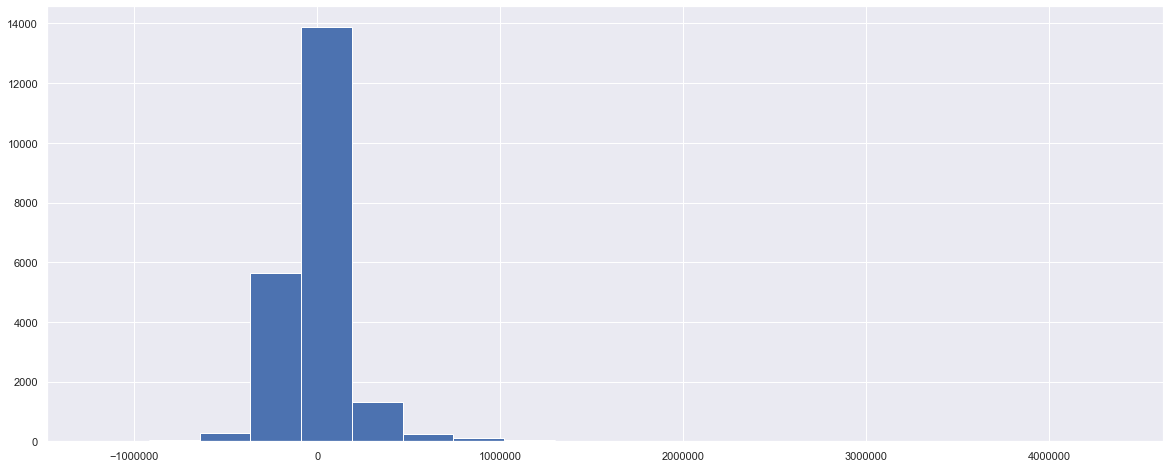

In [129]:
scaler = RobustScaler()
lr = LinearRegression()
pipe_base_1 = make_pipeline(scaler, lr)

pipe_base_1 = model_evaluate(pipe_base_1) # returns a list of pipelines
y_pred = model_predict(pipe_base_1)
plot_residuals()

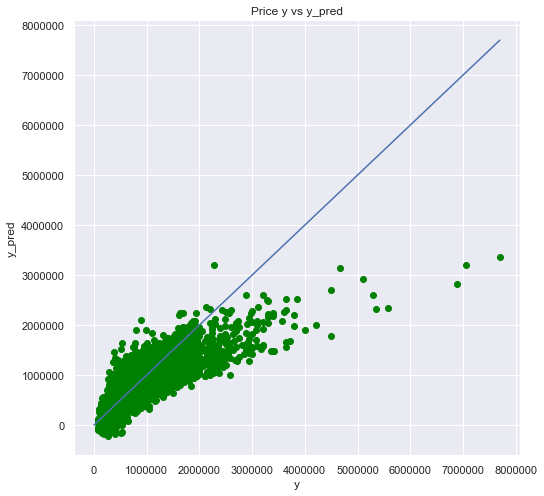

In [139]:

plt.figure(figsize=(8,8))
plt.scatter(y,y_pred, color = 'green')
plt.plot([0,7700000],[0,7700000], linestyle='solid')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.title('Price y vs y_pred')
plt.show()

In [145]:
### Observation:
#the base model-1 has r2 close to 0.7. 
# Also it cannot predict well prices above 1.2mln (per plots)

### 2c) Baseline : Linear (OLS) Regression with reduced features

------------------------------------------------------------
test_r2 :
					 0.6626 +/- 0.0081
test_neg_mean_absolute_error :
					 -135698.5700 +/- 4475.6590

------------------------------------------------------------
test_neg_mean_squared_error :
					 -45446068998.6847 +/- 3944575029.6675
Beta_1 :	 -52563.6961 +/- 2744.6452
Beta_2 :	 45779.2916 +/- 10605.4389
Beta_3 :	 163859.9859 +/- 28296.2592
Beta_4 :	 -319.7236 +/- 292.9621
Beta_5 :	 20412.2588 +/- 6386.4464
Beta_6 :	 547966.2337 +/- 108713.9797
Beta_7 :	 70524.3890 +/- 6062.2624
Beta_8 :	 25768.5556 +/- 3818.6109
Beta_9 :	 139527.6005 +/- 25138.0850
Beta_10 :	 35888.9289 +/- 16724.0919
Beta_11 :	 -91871.7455 +/- 6143.6561
Beta_12 :	 -59002.1782 +/- 2112.1442
Beta_13 :	 144010.4763 +/- 2852.1131
Beta_14 :	 -58960.1226 +/- 4053.7282
Beta_15 :	 28419.3305 +/- 4086.1794

------------------------------------------------------------


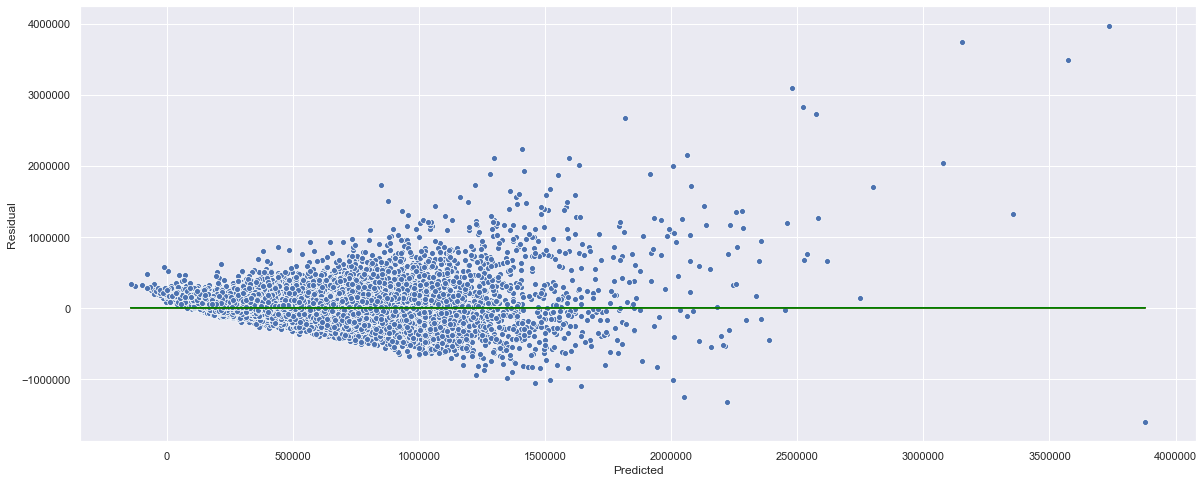

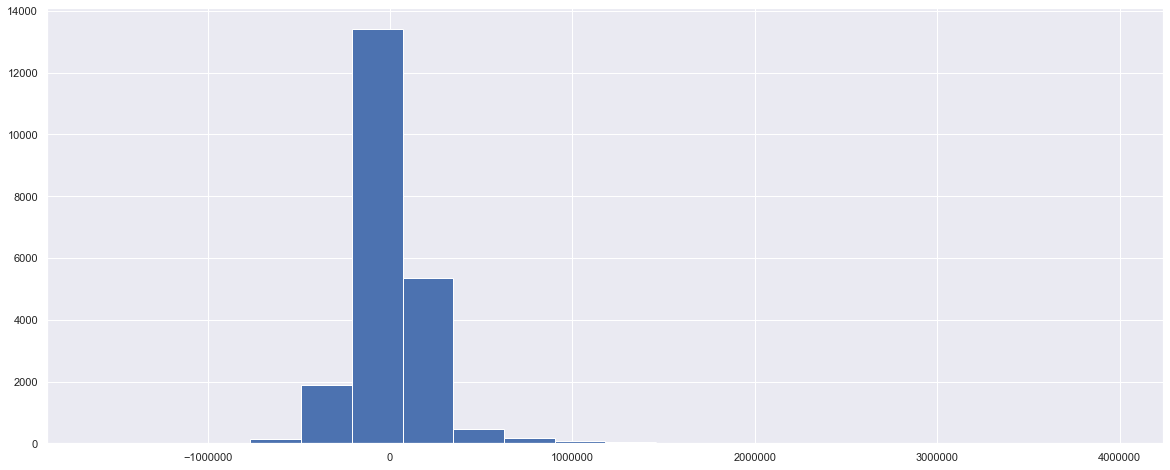

In [141]:
used_cols = used_cols_red
X = X_red

scaler = RobustScaler()
lr = LinearRegression()
pipe_base_2 = make_pipeline(scaler, lr)

pipe_base_2 = model_evaluate(pipe_base_2) # returns a list of pipelines
y_pred = model_predict(pipe_base_2)
plot_residuals()

In [161]:
### Observation:
#the base model-2 has r2 score of 0.66, which is less than with all features.
# it has the same problems with predicting prices above 1.2 mln.
# lack of training data for higher price range could be the issue.

In [158]:
###As we can see majority of the data is within 1.2 mln. 
print('Price below $1.2mln:', len(df.loc[df['price']<=1.2*10**6]))
print('All data           :', len(df))

Price below $1.2mln: 20618
All data           : 21596


### Check if base model could improve with price range below $1.2 mln

In [159]:
df_test = df.loc[df['price']<=1.2*10**6]

------------------------------------------------------------
test_r2 :
					 0.7008 +/- 0.0094
test_neg_mean_absolute_error :
					 -88963.0244 +/- 764.4220

------------------------------------------------------------
test_neg_mean_squared_error :
					 -14009528862.1351 +/- 201079023.9905
Beta_1 :	 -10687.5387 +/- 1335.0148
Beta_2 :	 24532.7090 +/- 1433.4051
Beta_3 :	 65046.7784 +/- 18540.8399
Beta_4 :	 1311.9175 +/- 229.4976
Beta_5 :	 36386.4896 +/- 2230.8547
Beta_6 :	 161448.8686 +/- 31707.2820
Beta_7 :	 31917.4663 +/- 1342.6918
Beta_8 :	 26255.8342 +/- 1489.3399
Beta_9 :	 75743.6858 +/- 1831.7258
Beta_10 :	 11817.6818 +/- 16648.0049
Beta_11 :	 8292.5102 +/- 8897.1638
Beta_12 :	 -87804.3880 +/- 1850.6052
Beta_13 :	 -19411.3262 +/- 2050.2118
Beta_14 :	 117833.4554 +/- 1303.4823
Beta_15 :	 -11073.1084 +/- 2383.8943
Beta_16 :	 40856.6639 +/- 3448.2560
Beta_17 :	 -857.7459 +/- 292.6164
Beta_18 :	 23134.8406 +/- 3079.2715
Beta_19 :	 809.1281 +/- 2142.5874

------------------------------

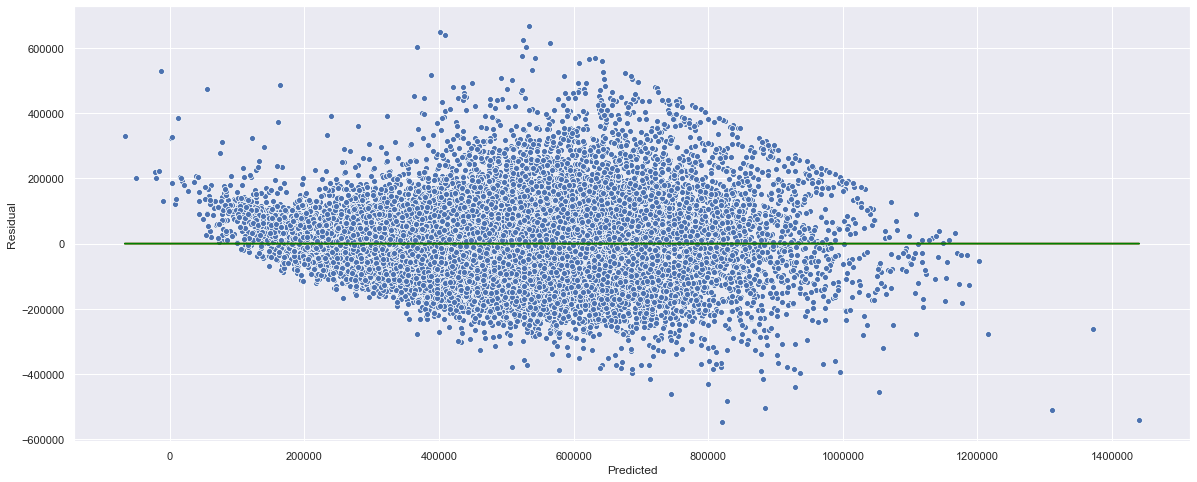

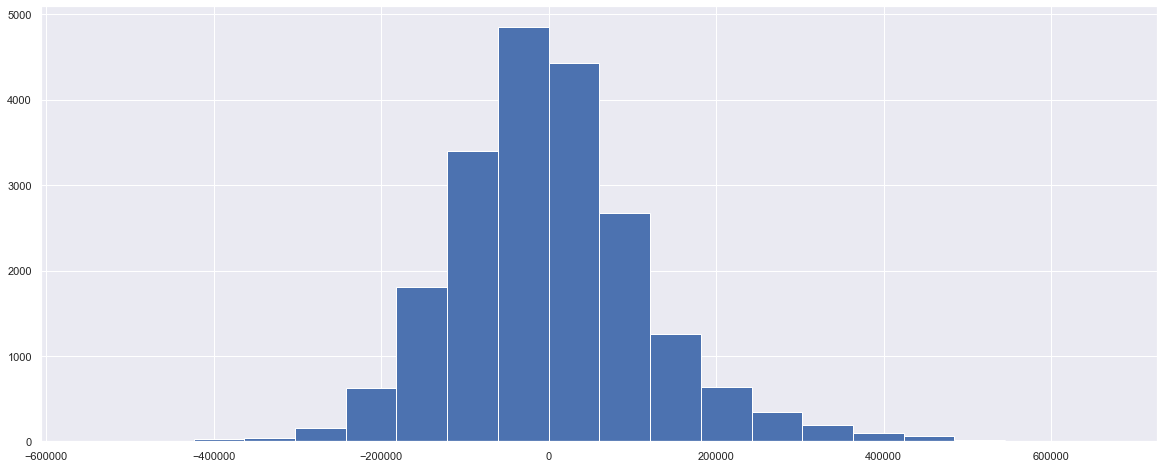

In [160]:
used_cols = [c for c in df_test.columns.tolist() if c not in ['price']]
X, y = df_test[used_cols], df_test['price']
   
scaler = RobustScaler()
lr = LinearRegression()
pipe_test = make_pipeline(scaler, lr)

pipe_test = model_evaluate(pipe_test) # returns a list of pipelines
y_pred = model_predict(pipe_test)
plot_residuals()

### 3. Additive Models (Linear Models + New Bases)

### 3a. MARS (Multivariate Adaptive Regression Splines)

In [ ]:
# #All features
# used_cols = [c for c in df.columns.tolist() if c not in ['price']]
# X, y = df[used_cols], df['price']

# #lets create used_cols_reduced with some of the features dropped
# used_cols_red = ['bedrooms', 'bathrooms', 'sqft_living', 
#                  'sqft_lot', 'floors', 'waterfront', 'view', 
#                  'condition', 'sqft_above', 'sqft_basement', 'yr_built', 
#                  'zipcode', 'lat', 'long','year_sale']
# X_red = df[used_cols_red]

### MARS with one DoF (with all features)

In [166]:
#All features
used_cols = [c for c in df.columns.tolist() if c not in ['price']]
X, y = df[used_cols], df['price']

------------------------------------------------------------
test_r2 :
					 0.7033 +/- 0.0211
test_neg_mean_absolute_error :
					 -122011.4568 +/- 2424.5694

------------------------------------------------------------
test_neg_mean_squared_error :
					 -39763688387.1413 +/- 1769187606.3467


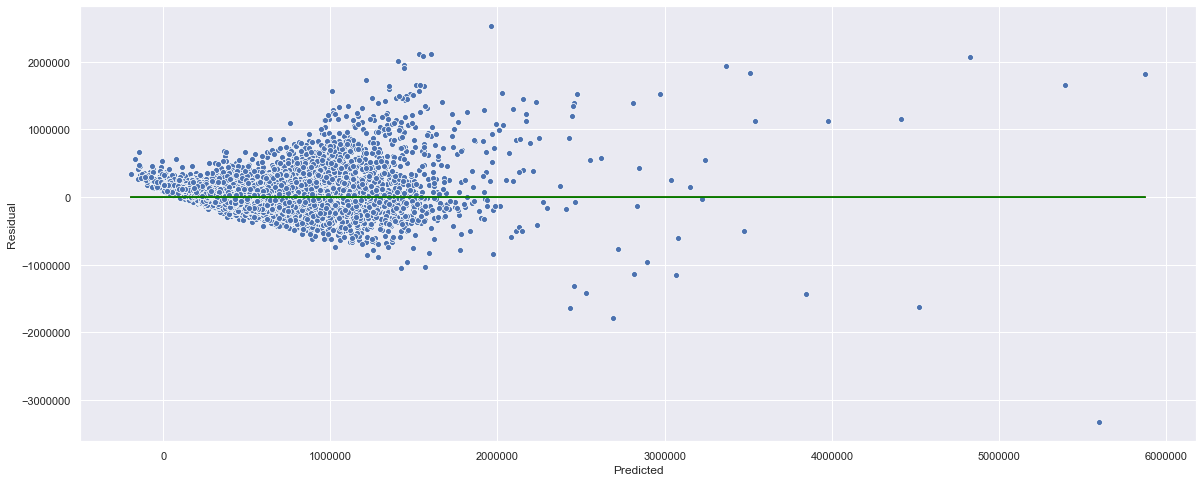

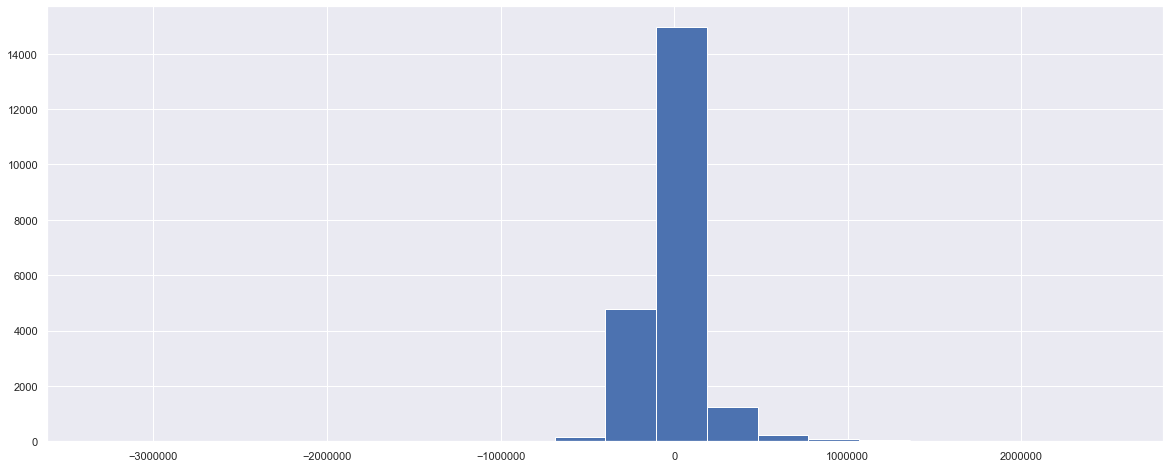

In [168]:
criteria = ('rss', 'nb_subsets')

mars1 = Earth(max_degree=1,
             feature_importance_type=criteria)
pipe_mars1 = make_pipeline(scaler, mars1)
pipe_mars1 = model_evaluate(pipe_mars1, bagging=False)
y_pred = model_predict(pipe_mars1)
plot_residuals()

In [169]:
mars1.fit(X,y)
print(mars1.summary())
print(mars1.summary_feature_importances(sort_by='nb_subsets'))

Earth Model
---------------------------------------------
Basis Function         Pruned  Coefficient   
---------------------------------------------
(Intercept)            No      -2.01136e+07  
h(sqft_living-5635)    No      711.854       
h(5635-sqft_living)    No      -64.3692      
h(lat-47.2989)         No      591631        
h(47.2989-lat)         Yes     None          
view                   No      52199         
grade                  No      98787.5       
yr_built               No      -2728.13      
waterfront             No      608714        
h(sqft_lot15-6310)     No      -0.238961     
h(6310-sqft_lot15)     No      17.9093       
zipcode                No      -593.467      
sqft_living15          No      48.0372       
long                   No      -186520       
h(sqft_basement-2580)  No      -751.759      
h(2580-sqft_basement)  No      -56.6594      
condition              No      29610         
bedrooms               No      -26335.8      
h(bathrooms-6)        

### MARS with two DoF (with all features)

------------------------------------------------------------
test_r2 :
					 0.7888 +/- 0.0300
test_neg_mean_absolute_error :
					 -101784.5077 +/- 4969.0268

------------------------------------------------------------
test_neg_mean_squared_error :
					 -28397218745.2523 +/- 4316703743.9997


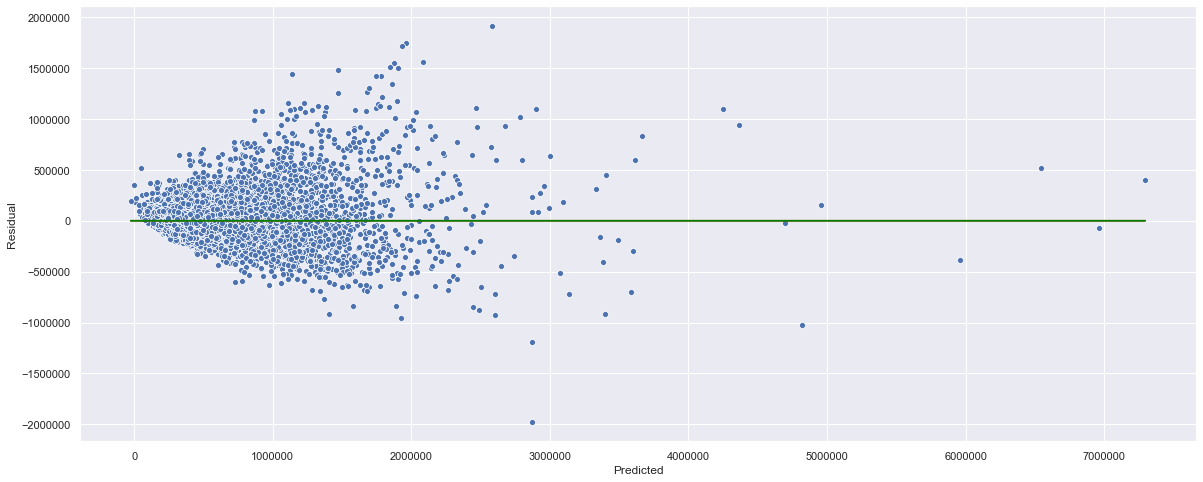

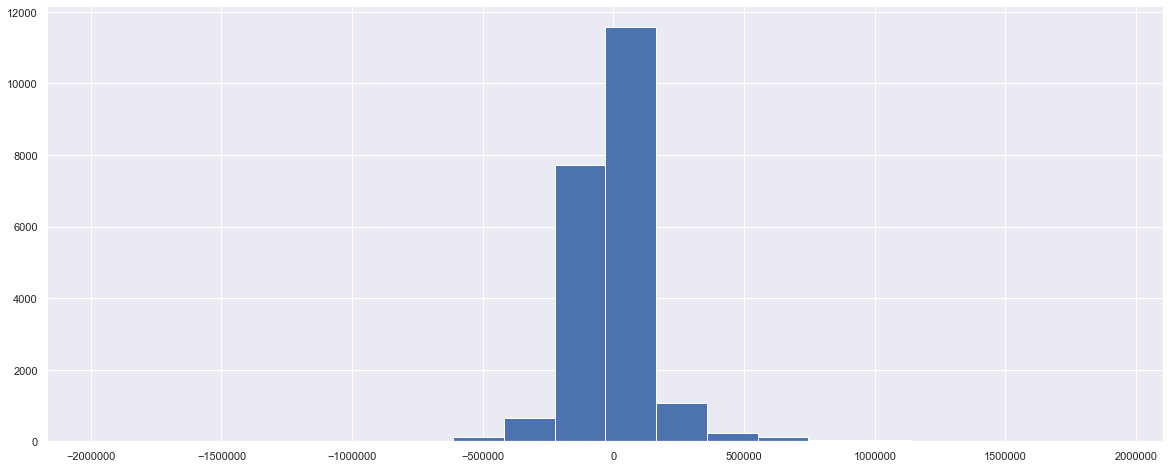

In [171]:
mars2 = Earth(max_degree=2,
             feature_importance_type=criteria)
pipe_mars2 = make_pipeline(scaler, mars2)
pipe_mars2 = model_evaluate(pipe_mars2, bagging=False)
y_pred = model_predict(pipe_mars2)
plot_residuals()

In [173]:
mars2.fit(X,y)
print(mars2.summary())
print(mars2.summary_feature_importances(sort_by='nb_subsets'))

Earth Model
---------------------------------------------------------------
Basis Function                           Pruned  Coefficient   
---------------------------------------------------------------
(Intercept)                              No      9.60895e+07   
h(sqft_living-5635)                      No      448077        
h(5635-sqft_living)                      No      -909.071      
h(lat-47.2989)                           Yes     None          
h(47.2989-lat)                           No      1.29773e+06   
grade*h(lat-47.2989)                     No      318791        
yr_built*h(lat-47.2989)                  No      -9902.72      
waterfront*h(lat-47.2989)                No      2.45908e+06   
lat*h(lat-47.2989)                       No      -3.79316e+06  
sqft_living*h(5635-sqft_living)          No      -0.0552638    
sqft_lot*h(sqft_living-5635)             No      -0.000826269  
view*h(lat-47.2989)                      No      156288        
zipcode                     

### MARS with two DoF (with reduced features)

In [174]:
#lets create used_cols_reduced with some of the features dropped
used_cols_red = ['bedrooms', 'bathrooms', 'sqft_living', 
                 'sqft_lot', 'floors', 'waterfront', 'view', 
                 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 
                 'zipcode', 'lat', 'long','year_sale']
X_red = df[used_cols_red]

------------------------------------------------------------
test_r2 :
					 0.7888 +/- 0.0300
test_neg_mean_absolute_error :
					 -101784.5077 +/- 4969.0268

------------------------------------------------------------
test_neg_mean_squared_error :
					 -28397218745.2523 +/- 4316703743.9997


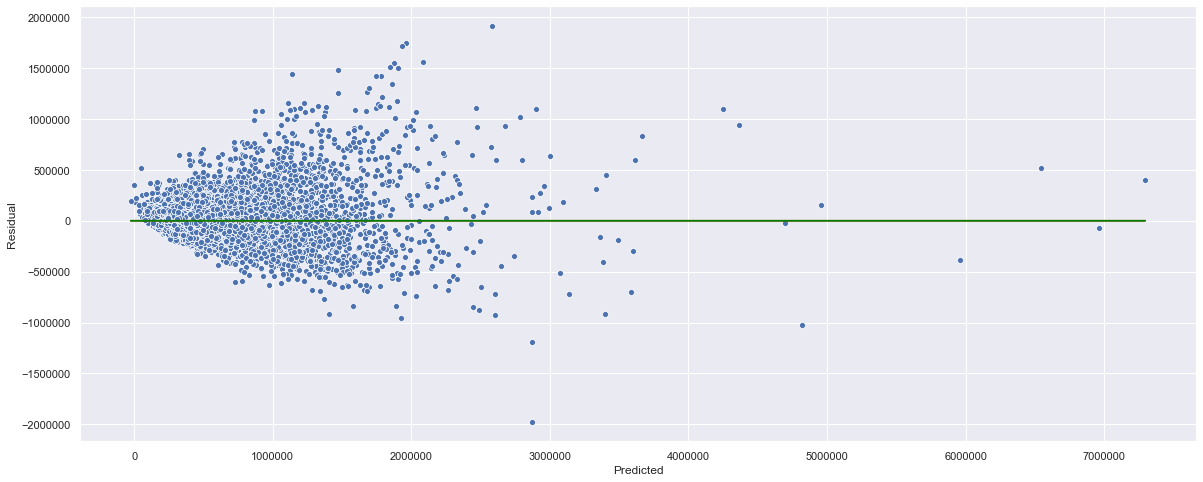

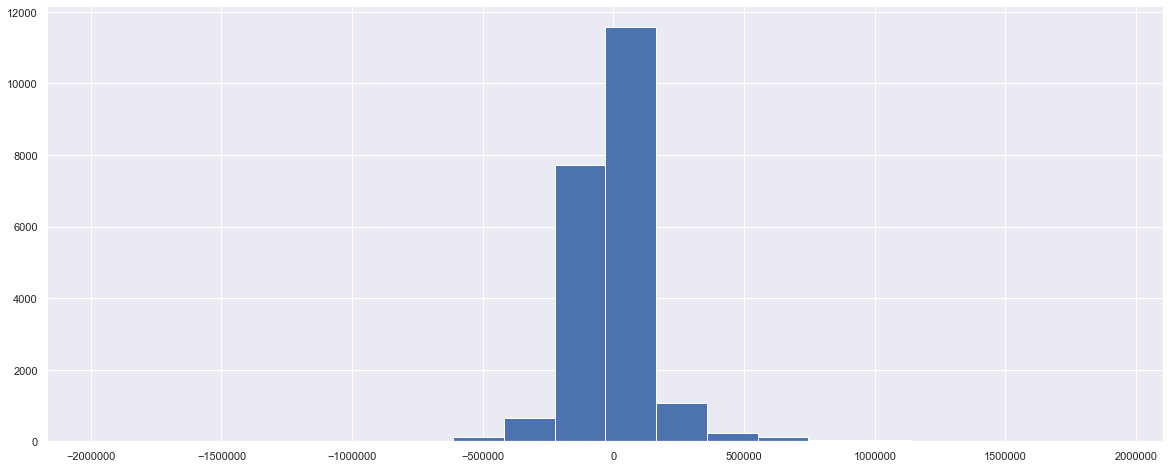

In [176]:
mars3 = Earth(max_degree=2,
             feature_importance_type=criteria)
pipe_mars3 = make_pipeline(scaler, mars3)
pipe_mars3 = model_evaluate(pipe_mars3, bagging=False)
y_pred = model_predict(pipe_mars3)
plot_residuals()

In [179]:
mars3.fit(X,y)
print(mars3.summary())
print(mars3.summary_feature_importances(sort_by='nb_subsets'))

Earth Model
---------------------------------------------------------------
Basis Function                           Pruned  Coefficient   
---------------------------------------------------------------
(Intercept)                              No      9.60895e+07   
h(sqft_living-5635)                      No      448077        
h(5635-sqft_living)                      No      -909.071      
h(lat-47.2989)                           Yes     None          
h(47.2989-lat)                           No      1.29773e+06   
grade*h(lat-47.2989)                     No      318791        
yr_built*h(lat-47.2989)                  No      -9902.72      
waterfront*h(lat-47.2989)                No      2.45908e+06   
lat*h(lat-47.2989)                       No      -3.79316e+06  
sqft_living*h(5635-sqft_living)          No      -0.0552638    
sqft_lot*h(sqft_living-5635)             No      -0.000826269  
view*h(lat-47.2989)                      No      156288        
zipcode                     

In [177]:
# #lets add degree of complexity

# mars4 = Earth(max_degree=3,
#              feature_importance_type=criteria)
# pipe4 = make_pipeline(scaler, mars4)
# pipe4 = model_evaluate(pipe4, bagging=False)
# y_pred = model_predict(pipe4)
# plot_residuals()

In [178]:
# mars4.fit(X,y)
# print(mars4.summary())
# print(mars4.summary_feature_importances(sort_by='nb_subsets'))

### GAM

In [180]:
# from pygam import LinearGAM

In [181]:
#All features
used_cols = [c for c in df.columns.tolist() if c not in ['price']]
X, y = df[used_cols], df['price']

In [182]:
gam = LinearGAM(n_splines=25)
gam.gridsearch(X.values, y.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:01:08 Time:  0:01:08


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    273.7322
Link Function:                     IdentityLink Log Likelihood:                               -533492.9897
Number of Samples:                        21596 AIC:                                          1067535.4438
                                                AICc:                                           1067542.55
                                                GCV:                                      21849402603.6503
                                                Scale:                                    21351472081.8831
                                                Pseudo R-Squared:                                   0.8438
Feature Function                  Lam

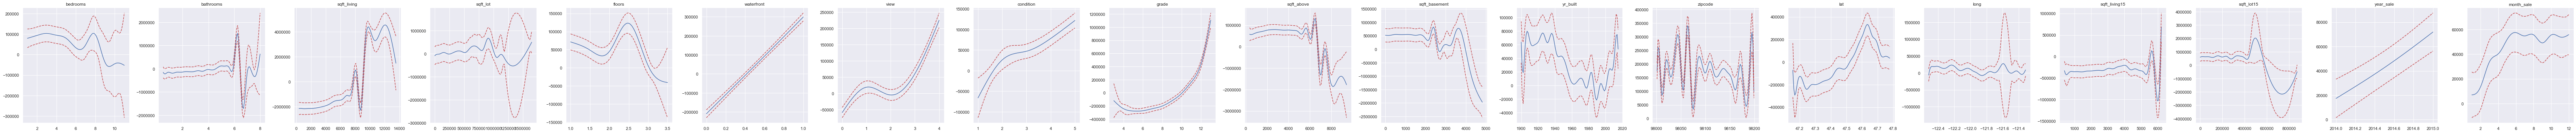

In [183]:
## plotting
N = len(used_cols)
fig, axs = plt.subplots(1,N,figsize=(N*5,5))

titles = used_cols
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i]);
fig.tight_layout()
fig.show()

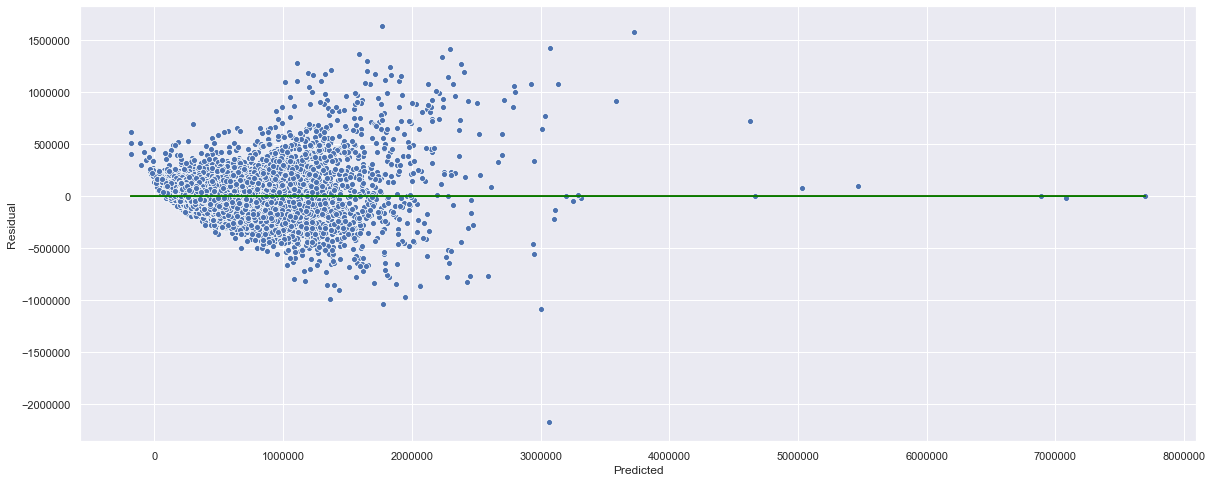

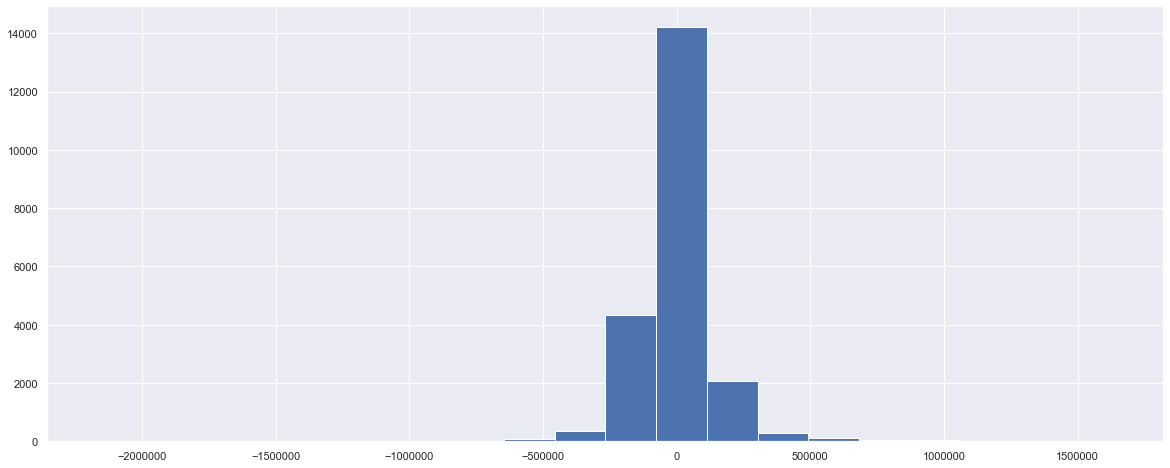

In [184]:
y_pred = model_predict([gam])
plot_residuals()

In [185]:
print(r2_score(y, y_pred),mean_absolute_error(y, y_pred))

0.8437980683440193 92359.22572712679


### GAM-2

In [194]:
print(used_cols, used_cols[13:15])

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year_sale', 'month_sale'] ['lat', 'long']


In [195]:
# DEFINE TERMS:
#   * splines - for continuous
#   * factors - for categorical/discrete 
#        (assumption: label encoded w/ 0 to level_size-1)
#   * tensors - for any interactions

# create the term list
term_list = []
for i, col in enumerate(used_cols):
    term_list.append(spline(i))

# add the x1 and x2 interaction term
term_list.append(tensor(13, 14))

# create the terms and model
terms = np.sum(term_list)
print(terms)

s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + te(13, 14)


In [196]:
gam = GAM(distribution='gamma', link='log', terms=terms)
gam.gridsearch(X.values, y.values)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:02:24 Time:  0:02:24


GAM                                                                                                       
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                    266.5184
Link Function:                          LogLink Log Likelihood:                               -273850.0518
Number of Samples:                        21596 AIC:                                           548235.1404
                                                AICc:                                          548241.8767
                                                GCV:                                                0.0289
                                                Scale:                                              0.0285
                                                Pseudo R-Squared:                                   0.9079
Feature Function                  Lam

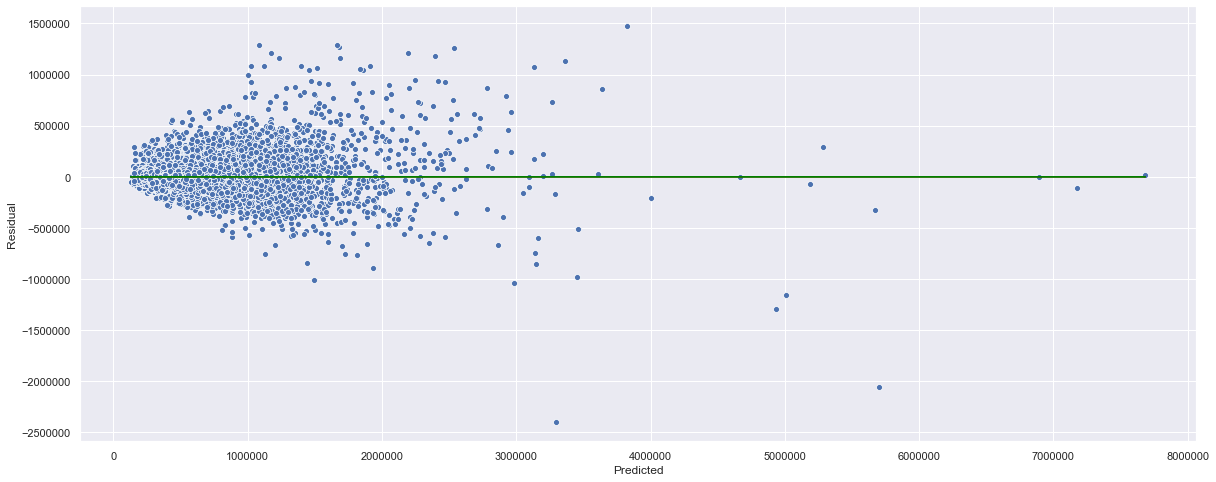

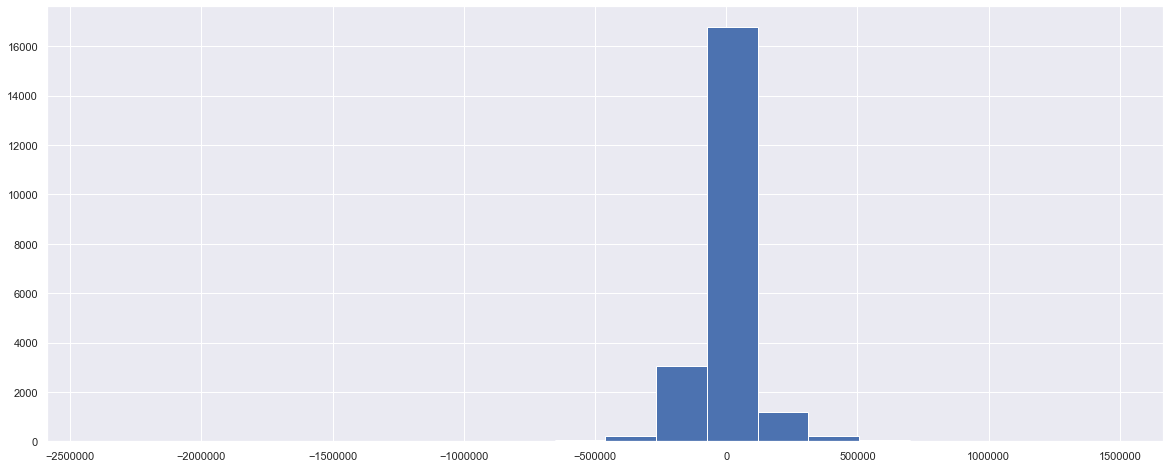

0.8991510336559448 67950.22285954967


In [197]:
y_pred = model_predict([gam])
plot_residuals()

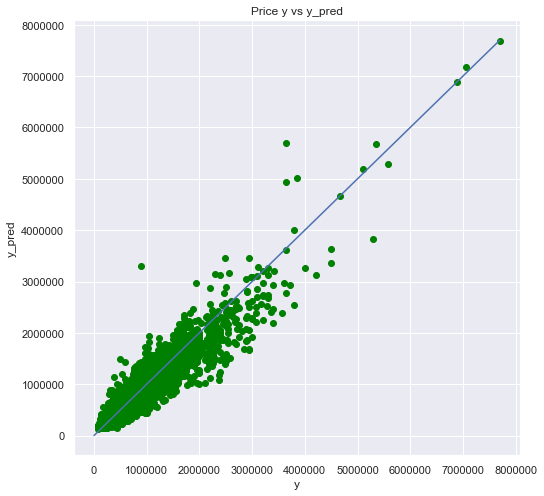

In [198]:
plt.figure(figsize=(8,8))
plt.scatter(y,y_pred, color = 'green')
plt.plot([0,7700000],[0,7700000], linestyle='solid')
plt.xlabel('y')
plt.ylabel('y_pred')
plt.title('Price y vs y_pred')
plt.show()

In [201]:
print(r2_score(y, y_pred),mean_absolute_error(y, y_pred), 
      np.sqrt(mean_squared_error(y,y_pred)))

0.8991510336559448 67950.22285954967 116663.89569559075
